## Plot spike trains
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import scipy.io

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg

/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'all_unit.mat')
all_units = scipy.io.loadmat(data_fpath)
all_units.keys()

dict_keys(['__header__', '__version__', '__globals__', 'unit_t'])

Plot spike train.

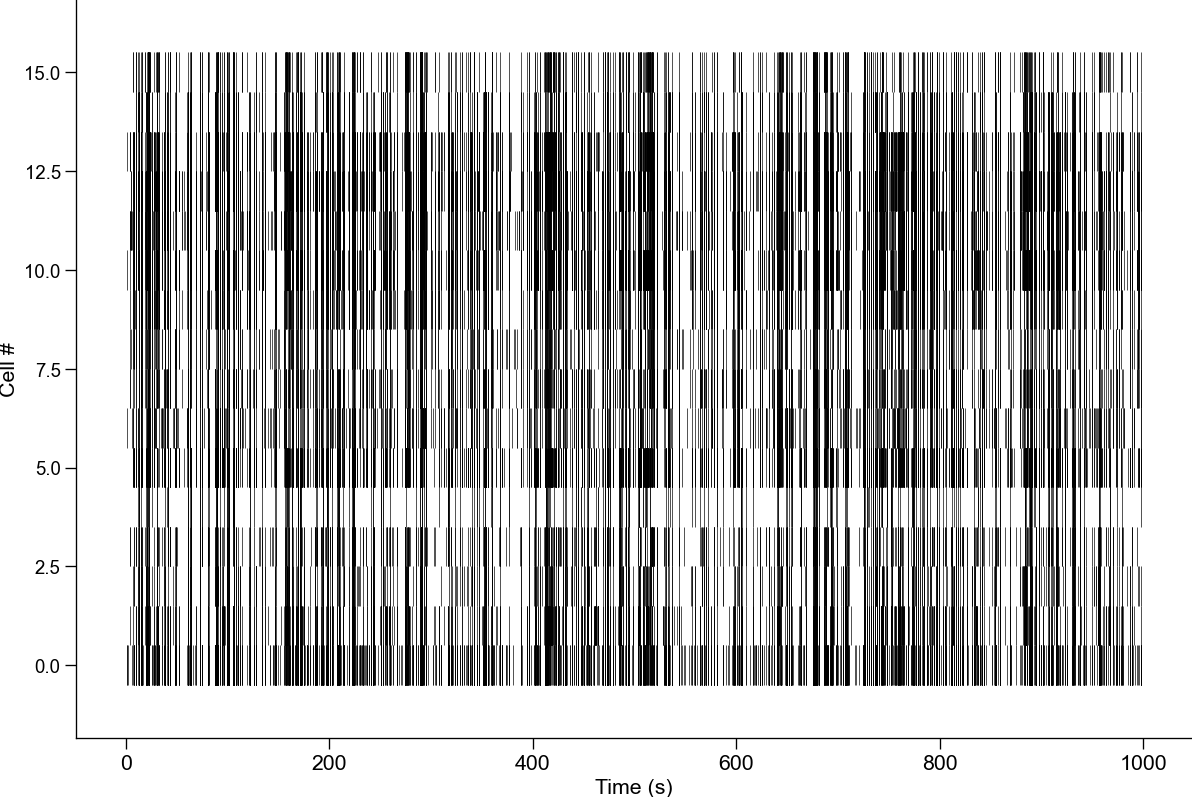

In [3]:
import matplotlib.pyplot as plt

n_cells = all_units['unit_t'].shape[1]

# plot spike trains for each cell
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cell in range(n_cells):
    ax.eventplot(all_units['unit_t'][0][cell].T, lineoffsets=cell, colors='k', linewidths=0.5)
    
# axis labels
ax.set_xlabel('Time (s)')
ax.set_ylabel('Cell #')

plt.show()

Plot autocorrelograms for individual cells.

(-20.0, 20.0)

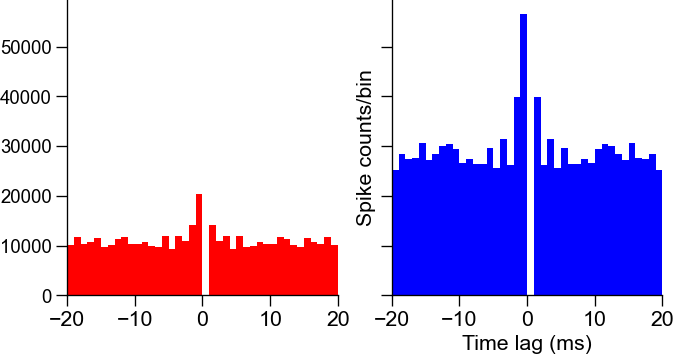

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)

# bin parameters
bin_size_ms = 1
max_lag_ms = 100

spike_train_1 = all_units['unit_t'][0][0].flatten()  # in milliseconds
plot_acg(spike_train_1, bin_size_ms, max_lag_ms, color='red', ax=ax[0], labels=False)
ax[0].set_xlim(-20, 20)

spike_train_2 = all_units['unit_t'][0][10].flatten()  # in milliseconds
plot_acg(spike_train_2, bin_size_ms, max_lag_ms, color='blue', ax=ax[1])
ax[1].set_xlim(-20, 20)

Cross-correlogram plots between units.

In [35]:
spike_train_1

array([7.0148000e-01, 8.9756000e-01, 1.9828800e+00, ..., 9.9802556e+02,
       9.9803456e+02, 9.9806396e+02])

(2001,)


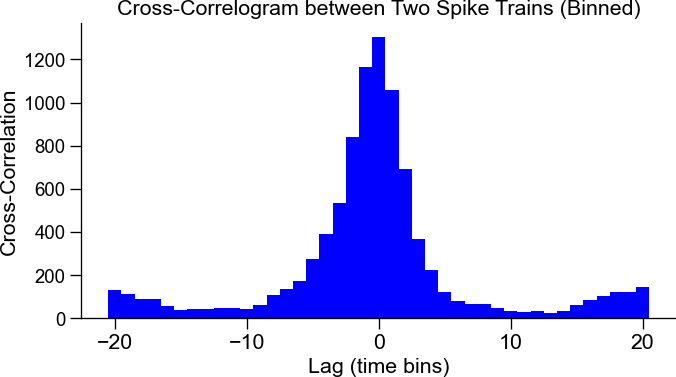

In [45]:
# cross-correlogram between two spike trains

# Create time bins
bin_size = 0.05  # in seconds
bins = np.arange(0, 100 + bin_size, bin_size)
print(bins.shape)

# Binning spike times (converting continuous spike times into a binned spike train)
spike_train_1_binned, _ = np.histogram(spike_train_1, bins)
spike_train_2_binned, _ = np.histogram(spike_train_2, bins)

# Define a function to compute cross-correlation between binned spike trains
def cross_correlogram(spike_train_1, spike_train_2, max_lag):
    """Compute the cross-correlation of two binned spike trains."""
    lags = np.arange(-max_lag, max_lag + 1)
    corr = np.correlate(spike_train_1, spike_train_2, mode='full')
    middle_index = len(corr) // 2
    return corr[middle_index - max_lag: middle_index + max_lag + 1], lags

# Set maximum lag (in bins)
max_lag = 20  # Example: 20 bins

# Compute cross-correlation
correlation, lags = cross_correlogram(spike_train_1_binned, spike_train_2_binned, max_lag)
d
# Plot the cross-correlogram
plt.figure(figsize=(8, 4))
plt.bar(lags, correlation, width=1, color='blue')  # --> fix the lags here
plt.title('Cross-Correlogram between Two Spike Trains (Binned)')
plt.xlabel('Lag (time bins)')
plt.ylabel('Cross-Correlation')

plt.show()

In [41]:
bins.shape[0]

1001

TO DO: 
- Plot for multiple spike trains
    - option to subselect for only 1



- Quality controls
    - Build in quality controls to assess the refractory periods (isi violations)
    - Additional QCs?


- Style is not being fitted globally --> the decorator is useless?